<a href="https://colab.research.google.com/github/Nicolas-BZRD/Multi-Video-Temporal-Synchronization/blob/main/Siamese_CNN_model_identical_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Siamese CNN - identical image

In [86]:
import os
import random

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from PIL import Image, ImageOps

import tensorflow as tf
from tensorflow.keras import models, layers

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Dataset

dataset: https://cs.stanford.edu/people/rak248/VG_100K_2/images2.zip

In [7]:
data_dir = "/content/drive/MyDrive/ISIA Lab/Dataset/VG"
listImages = os.listdir(data_dir)
len(listImages)

43903

In [83]:
def randomPairImageCroped(npArr):
  height, width = npArr.shape

  randHeight = random.randint(0, int(height*0.2))
  randWidth = random.randint(0, int(width*0.2))

  return (
      npArr[0:(height-randHeight),0:(width-randWidth)],
      npArr[randHeight:, randWidth:]
  )

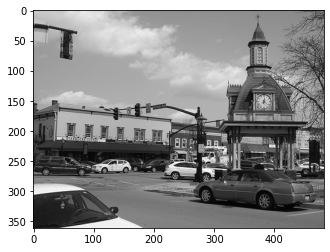

In [96]:
image = Image.open(f'/content/drive/MyDrive/ISIA Lab/Dataset/VG/{listImages[0]}')
image = ImageOps.grayscale(image)
image = np.array(image)

r, l = randomPairImageCroped(image)

plt.imshow(r, cmap='gray', vmin=0, vmax=255)
plt.show()

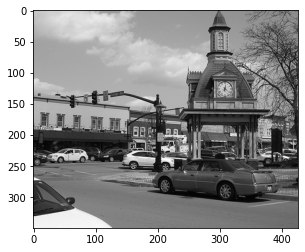

In [88]:
plt.imshow(l, cmap='gray', vmin=0, vmax=255)
plt.show()

In [54]:
randomPairImageCroped(x)

2


In [46]:
listImages = random.sample(listImages, int( len(listImages)/4 ))
len(listImages)

10975

##Model

In [42]:
IMG_SHAPE = (224, 224, 1)

BASE_OUTPUT = "/content/drive/MyDrive/ISIA Lab/Siamese CNN"
MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "siamese_model"])

In [45]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SHAPE))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(48, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.15))

model.add(layers.Conv2D(48, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.GlobalAveragePooling2D())

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_92 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 72, 72, 48)        13872     
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 36, 36, 48)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 36, 36, 48)        0         
                                                                 
 conv2d_94 (Conv2D)          (None, 34, 34, 48)      